# Noise Study to look at detection thresholds with and without analog EHZ channels

## SQL querries for UW, UO, and CC

### 4 channel stations with EHZ and ENZ or HNZ

``` psql -h $AWS_POSTGRES_SERVER  -d pnsn_web_production -c "\copy (select c1.sta, c1.seedchan, c1.net, c1.location from channels c1, channels c2  where c1.net in ('UW','UO','CC') and c1.sta=c2.sta and c1.seedchan='EHZ' and c2.seedchan in  ('ENZ','HNZ')) to '~/4_component.csv' WITH (FORMAT CSV, HEADER TRUE, FORCE_QUOTE *);"```

### All Broadband

``` psql -h $AWS_POSTGRES_SERVER  -d pnsn_web_production -c "\copy (select sta, seedchan, net, location from channels  where net in ('UW','UO','CC') and  seedchan in  ('BHZ','HHZ')) to '~/all_bb.csv' WITH (FORMAT CSV, HEADER TRUE, FORCE_QUOTE *);"```

###  EHZ  with ENZ or HNZ

```psql -h $AWS_POSTGRES_SERVER  -d pnsn_web_production -c "\copy (select sta, seedchan, net, location from channels  where net in ('UW','UO','CC') and  seedchan ='EHZ') to '~/ehz.csv' WITH (FORMAT CSV, HEADER TRUE, FORCE_QUOTE *);" ```

## Query FDSN using above CSV and output CSV with location and samprate

In [3]:
import os; os.chdir('..')

In [6]:
%run -i magD/make_csv.py -i csv/2017_EHZ_study/all_bb.csv -o csv/2017_EHZ_study/all_bb_fdsn.csv

In [3]:
%run -i magD/make_csv.py -i csv/2017_EHZ_study/ehz.csv -o csv/2017_EHZ_study/ehz_fdsn.csv

Query for BLJ:EHZ:UW:-- failed with:HTTP Error 404: Not Found


In [5]:
%run -i magD/make_csv.py -i csv/2017_EHZ_study/4_component.csv -o csv/2017_EHZ_study/4_component_fdsn.csv

## Create and save vectors

In [ ]:
 %run

### Run magD with the above csv files
MagD commit https://github.com/pnsn/magD/commit/fb1293d954e2674f4477df7b60e3d0029672c823

magd_client commit https://github.com/pnsn/magd_client/commit/30d24d7363a88c5f87f804ce001083d9d797afd0

#### Run 1: All EHZ, BHZ, and HHZ
All UW, UO, CC Broadbands and Short periods

In [2]:
%matplotlib inline

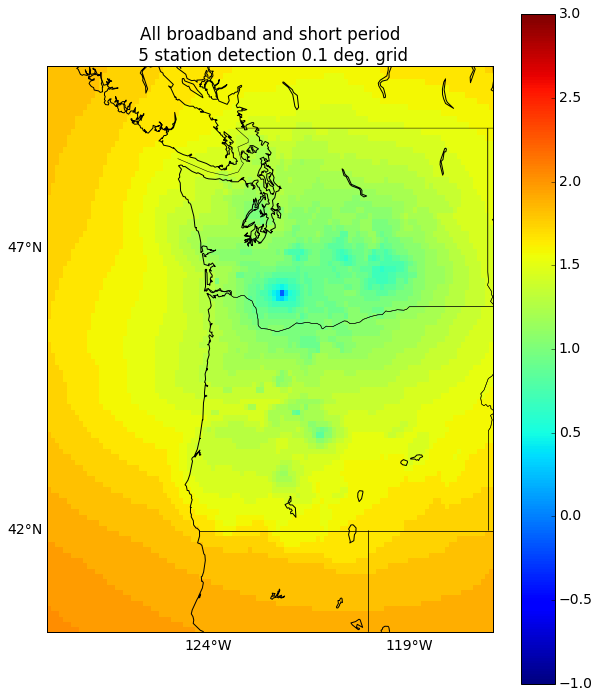

In [3]:
%run -i scripts/ehz_profile.py config/ehz_profile/ehz_and_bb.ini

### Run 2: Run BB and Digital SP
All UW,UO,CC Broadbands and Digitized Short Periods

This scenerio shows detection threshold minus the analog rack

-1.0
3.0


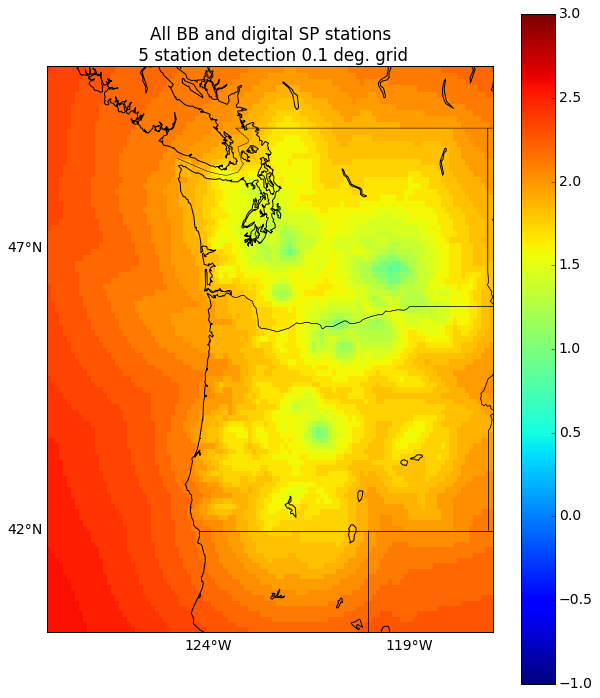

In [4]:
%run -i scripts/ehz_profile.py config/ehz_profile/no_rack.ini

### Run 3: Diff after removing all SP
Increase in detection after removing analog short period stations (rack)

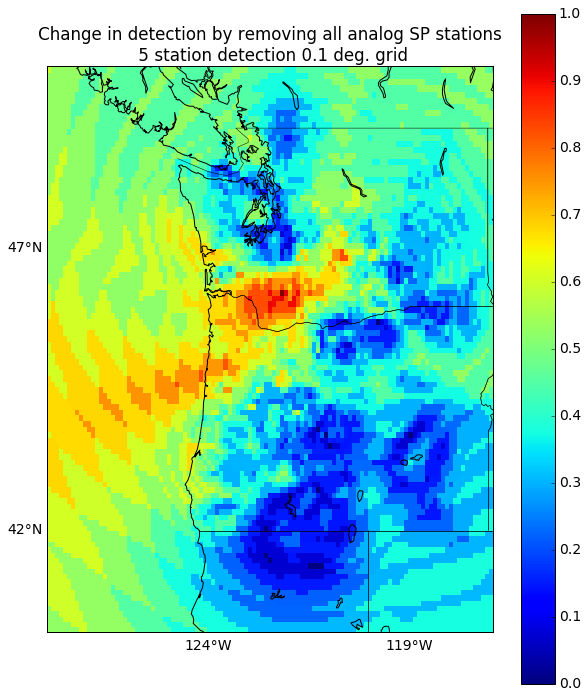

In [4]:
%run -i scripts/ehz_profile.py config/ehz_profile/no_rack-all_diff.ini